In [1]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 107.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
import ultralytics
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:



rf = Roboflow(api_key="9PKUVRT5NQtWlVle9Fkf")
project = rf.workspace("engineering-3bqg7").project("flame-u0hjs-psxt3")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to flame-1 in yolov8:: 100%|██████████| 430/430 [00:00<00:00, 11017.62it/s]


In [14]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/flame-1/data.yaml epochs=10 imgsz=420 plots=True

Ultralytics 8.3.183 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/flame-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=420, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=

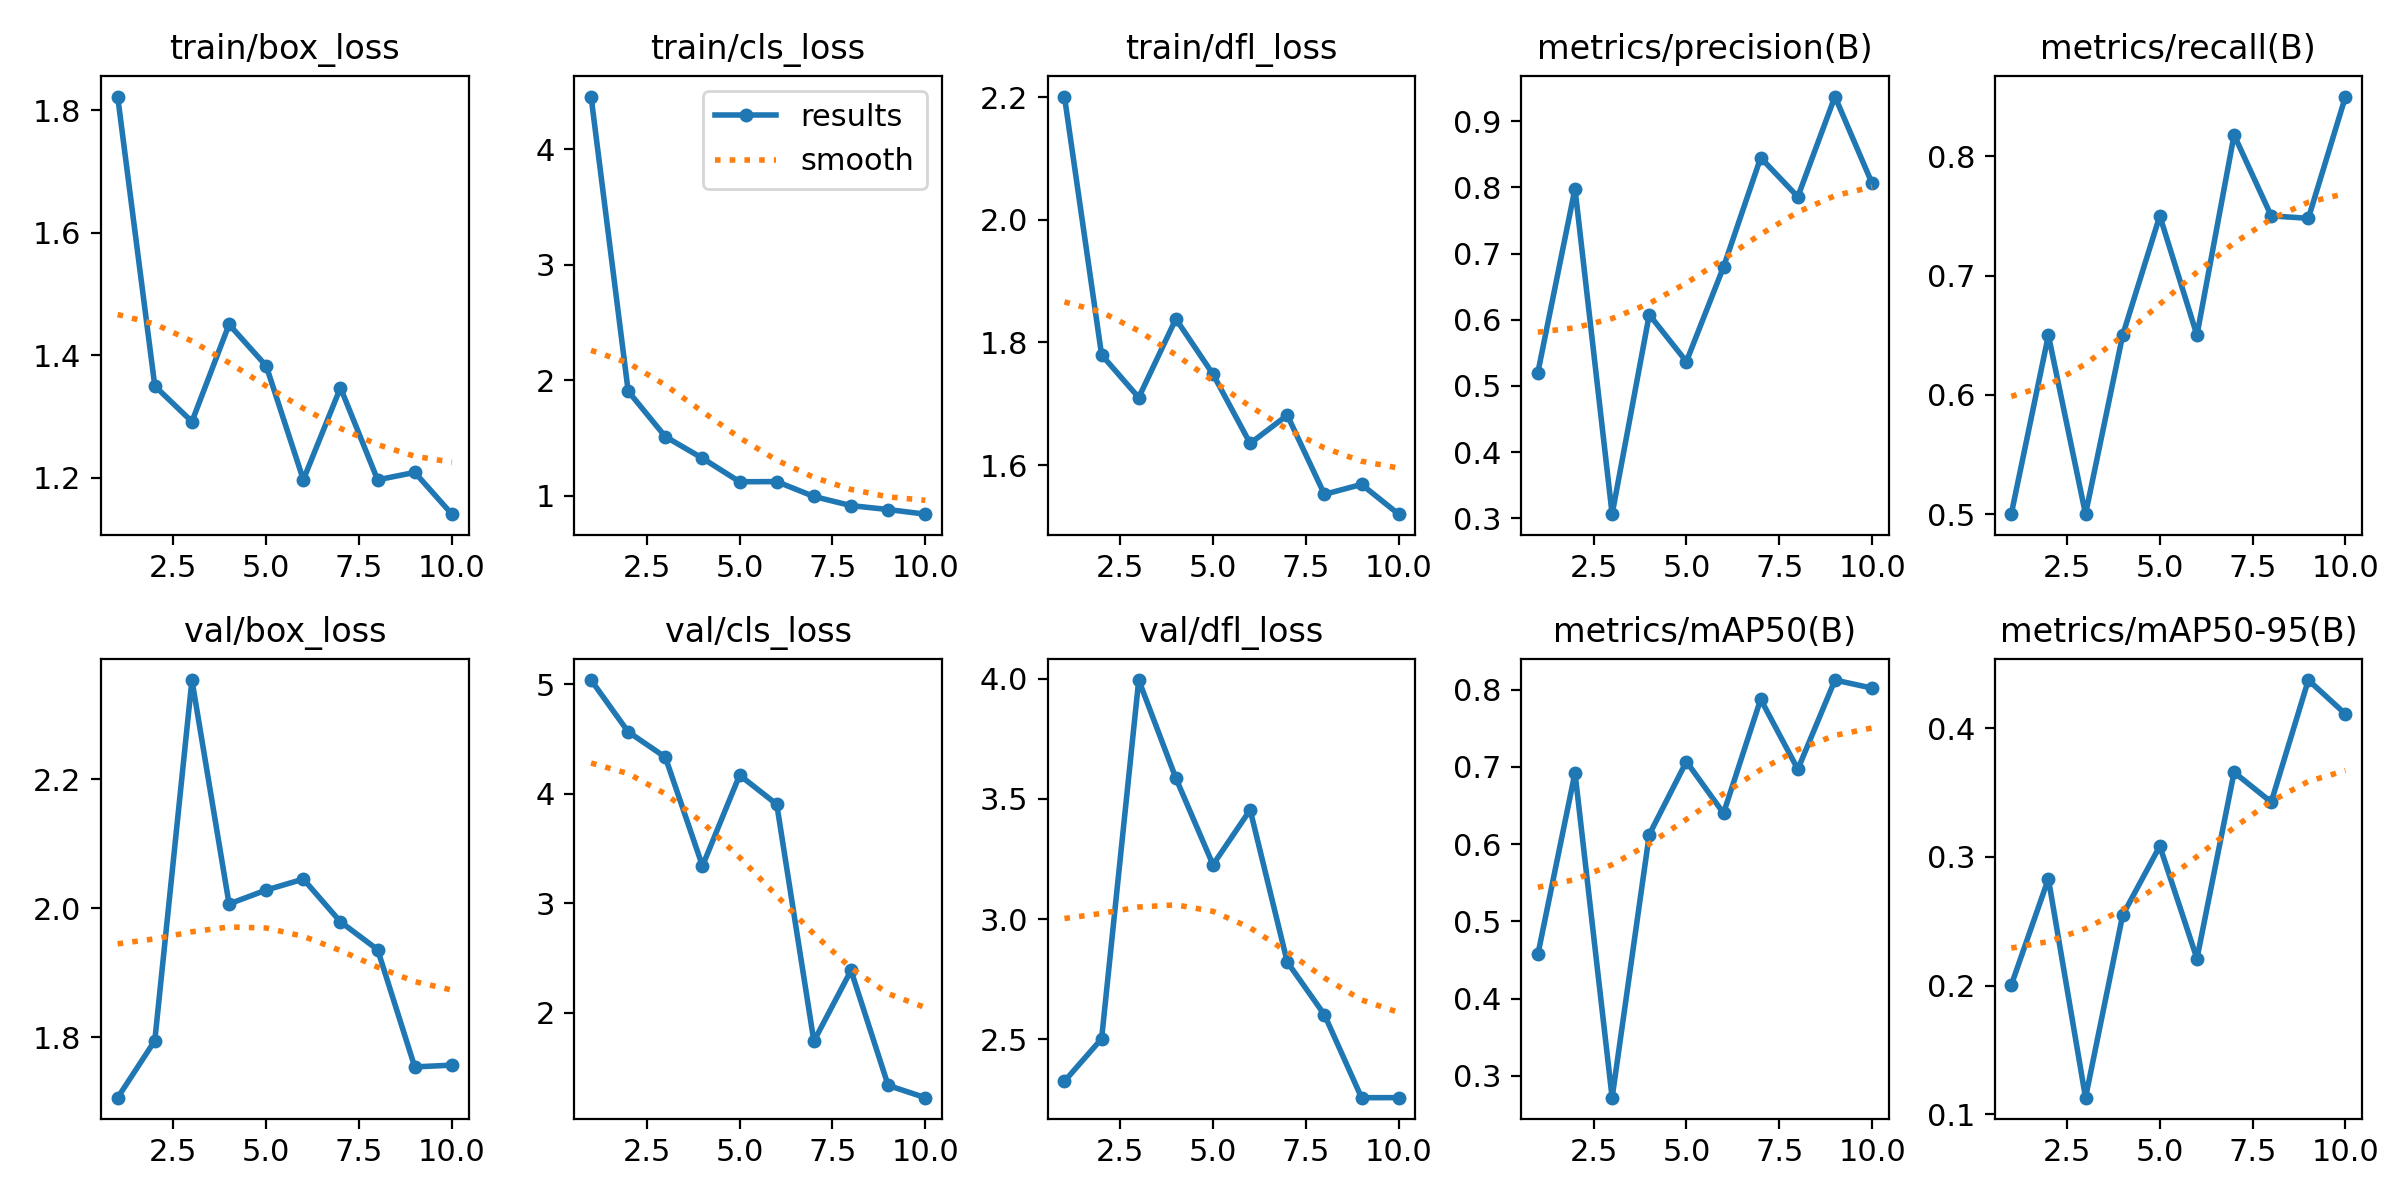

In [16]:
# VIEW MODEL TRANING CHARTS
Image(filename=f'/content/runs/detect/train3/results.png', width=600)

In [17]:
# VALIDATION
!yolo task=detect mode=val model=/content/runs/detect/train3/weights/best.pt data=/content/flame-1/data.yaml

Ultralytics 8.3.183 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 795.0±142.0 MB/s, size: 16.1 KB)
val: Scanning /content/flame-1/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:00<00:00,  3.10it/s]
                   all         20         20      0.937      0.748      0.813      0.437
Speed: 0.1ms preprocess, 17.7ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to runs/detect/val4
💡 Learn more at https://docs.ultralytics.com/modes/val


In [19]:
# Replace 'path/to/your/image.jpg' with the path to your image file
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt source='/content/test image/images.jpg'

Ultralytics 8.3.183 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/test image/images.jpg: 448x352 1 Api, 48.2ms
Speed: 2.0ms preprocess, 48.2ms inference, 136.0ms postprocess per image at shape (1, 3, 448, 352)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


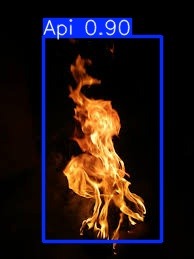

In [20]:
from IPython.display import Image

# Display the predicted image
Image(filename='/content/runs/detect/predict2/images.jpg')

In [23]:
import torch;
print(torch.__version__)

2.8.0+cu126


In [21]:
# Replace 'path/to/your/video.mp4' with the path to your video file in Colab
# Replace '/content/runs/detect/train3/weights/best.pt' with the actual path to your best model if it's different
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt source='/content/test image/fire.mp4'

Ultralytics 8.3.183 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/1440) /content/test image/fire.mp4: 256x448 2 Apis, 60.5ms
video 1/1 (frame 2/1440) /content/test image/fire.mp4: 256x448 2 Apis, 11.3ms
video 1/1 (frame 3/1440) /content/test image/fire.mp4: 256x448 2 Apis, 8.2ms
video 1/1 (frame 4/1440) /content/test image/fire.mp4: 256x448 2 Apis, 9.2ms
video 1/1 (frame 5/1440) /content/test image/fire.mp4: 256x448 2 Apis, 8.2ms
video 1/1 (frame 6/1440) /content/test image/fire.mp4: 256x448 3 Apis, 8.5ms
video 1/1 (frame 7/1440) /content/test image/fire.mp4: 256x448 3 Apis, 8.1ms
video 1/1 (frame 8/1440) /content/test image/fire.mp4: 256x448 3 Apis, 9.2ms
video 1/1 (frame 9/1440) /content/test image/fire.mp4: 256x448 2 Apis, 8.3ms
video 1/1 (frame 10/1440) /content/test image/fire.mp4: 256x448 2 Apis, 9.6ms
video 1/1 (frame 11/1440) /content/test image/fire.mp4: 256x4